#S03 T02: Visualització gràfica de Múltiples variables
Anem a practicar i a familiaritzar-nos amb la Visualització gràfica de Múltiples variables. 

##Nivell 1

###Exercici 1

Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips". 

Descarreguem la pràctica [Examining Data](https://github.com/IT-Academy-BCN/Data-Science/blob/8ee91d2bb6f62809183f124e0b8cd23113527d16/Examining-Data/03%20EXAMINING%20DATA.ipynb) del GitHub del IT Academy i la base de dades [Tips](https://github.com/IT-Academy-BCN/Data-Science/blob/8ee91d2bb6f62809183f124e0b8cd23113527d16/Data-sources/tips.csv).
A continuació, enganxem aquí la pràctica Examining Data. Hi ha moltes seccions repetides en aquesta pràctica, intentaré fer un reendreçament.

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Exploració de variables bivariants amb Scatterplot

In [ ]:
#Carreguem el csv de tips
tips = pd.read_csv('/content/drive/MyDrive/IT Academy/Data Science/Srpint 3. Visualització de dades/Data-Science-main/Data-sources/tips.csv')
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Carreguem la base de dades Tips

In [ ]:
tips.shape

(244, 7)

`.shape` mostra el número de files i columnes.

In [ ]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

`.columns` mostra el nomb de les columnes i el tipus d'objecte.

In [ ]:
tips.smoker.unique()

array(['No', 'Yes'], dtype=object)

`.unique()` retorna els elements únics de l'Array, en aquest cas els elements únics de la columna **smoker**, que pot ser Yes o No.

In [ ]:
tips.day.nunique()

4

`.nunique` compta els elements diferents que hi ha a un Array, però no diu quants de cada. Per exemple, a la columna **day** diu que hi ha 4 dies diferents (de dijous a diumenge).


In [ ]:
tips.describe().round(3)

,total_bill,tip,size
count,244.000,244.000,244.000
mean,19.786,2.998,2.570
std,8.902,1.384,0.951
min,3.070,1.000,1.000
25%,13.348,2.000,2.000
50%,17.795,2.900,2.000
75%,24.127,3.562,3.000
max,50.810,10.000,6.000


`.describe()` fa un anàlisi estadístic de l'Array, amb el recompte, la mitjana, el màxim i el mínim, etc. A més, se li pot demanar un número màxim de decimals, en aquest cas arrodonint al tercer decimal: `.round(3)`.

####Mitja

  
$%$
\begin{align*}\bar{x}\:=\:\frac{x_1\:+\:x_2\:+\:· · ·\:+\:x_n}{n}\end{align*}   
$%$

In [ ]:
print(tips.tip.mean())
print(tips.tip.mean().round(3))

2.99827868852459
2.998


Podem veure que el valor de `.mean.round(3)` coincideix amb el donat més amunt a `.describe()`. Si no fem l'arrodoniment, podem veure tots els decimals de la mitja.

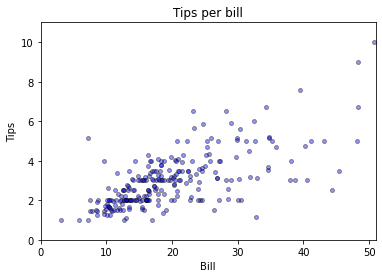

In [ ]:
# Create data
x = tips.total_bill
y = tips.tip
colors = 'Blue'
area = np.pi*5

plt.axis([0, 51, 0, 11])

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')

plt.title('Tips per bill')
plt.ylabel('Tips')
plt.xlabel('Bill')
plt.show()

En aquest punt hem adaptat la gràfica i hem ajustat els eixos segons els valors màxims de `tips` i de `bill` per acotar lo millor possible els punts.

#### Matrix plots

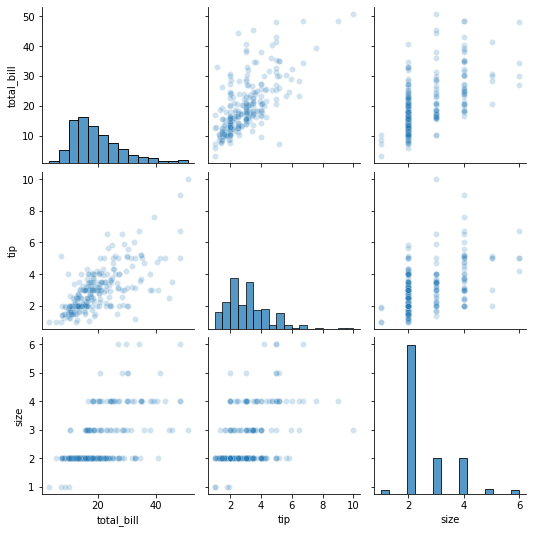

In [ ]:
# Matrix Plot
sns.pairplot(tips, diag_kind='hist', plot_kws={'alpha': 0.2})
plt.show()

La funció `pairplot` ens mostra una relació entre les diferents columnes (no totes) de la base de dades tips. En aquest cas, ens mostra la relació entre les Arrays **size**, **tip** i **total_bill**. Només es veu una lleugera relació entre **total_bill** i **tip** (a més gran la factura, més propina) i una llegua relació entre el tamany de la taula i la factura i la propina (a més persones, major la factura i més propina).

#### Histogrames

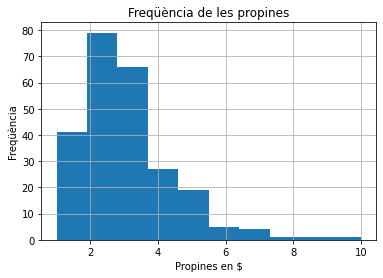

In [ ]:
tips.hist(['tip'], bins=10)
plt.title('Freqüència de les propines')
plt.ylabel('Freqüència')
plt.xlabel('Propines en $')
plt.show()

Es pot veure a l'histograma com les propines més comuns estan al voltant dels 2 $. Com que té una cola llarga cap a la dreta, es defineix com a *Right Skewed*. 

Com que la distribució només té un màxim, es considera de tipus modal.

<div class="alert alert-warning alert-warning"><b><u>Population Mean</u></b>

The <span style=color:blue><b><u>Population mean</u></b></span> has a special label :  <span style=color:blue>$\mu$</span>. The symbol <span style=color:blue>$\mu$</span> is the $Greek$ letter <span style=color:blue>$mu$</span> and represents the <span style=color:blue>average/mean of all observations in the <b>Population</b></span>.   
$%$   
Sometimes a subscript, such as <span style=color:blue><b>$_x$</b></span>, is used to represent which variable the <span style=color:blue><b>population mean</b></span> refers to, e.g. <span style=color:blue><b>$\mu_x$</b></span>
</div>

## <span style=color:darkgreen>Variance and Standard Deviation</span>

In [ ]:
tips.tip.mean() - tips.tip.std()

1.6146404995234076

### <span style=color:darkred>Variance</span>

The <span style=color:blue><b>mean</b></span> was introduced as a method to describe the <span style=color:blue>center of a data set</span>, but the <span style=color:blue><b><u>variability in the data</u></b></span> is also <b>important</b>.   

We introduce <span style=color:blue><b><u>two measures of variability</u></b></span>: the <span style=color:blue><b><u>Variance</u></b></span> and the <span style=color:blue><b><u>Standard Deviation</u></b></span>. Both are very useful in data analysis.   

The <span style=color:blue><b>Standard Deviation</b></span> describes <b>how far away</b> the typical <b>observation</b> is from the <span style=color:blue>mean</span>.

We call the <span style=color:blue><em>distance of an observation from its mean</em></span> its <span style=color:blue><b><u>Deviation</u></b></span>. 

Below are the <b>deviations</b> for the 1st, 2nd, 3rd, and 50th observations in the <b>num_char</b> variable. For computational convenience, the number of characters is listed in the thousands and rounded to the first decimal.

In [ ]:
tips.tip.iloc[[1], ]

1    1.66
Name: tip, dtype: float64

\begin{align*}x_1\:−\:\bar{x} = 21.7 − 11.6 = 10.1\end{align*}
\begin{align*}x_2\:−\:\bar{x} =\hspace{2.5mm}7.0 − 11.6 = −4.6\end{align*}
\begin{align*}x_3\:−\:\bar{x} =\hspace{2.5mm}0.6 − 11.6 = −11.0\end{align*}
\begin{align*}.\end{align*}
\begin{align*}.\end{align*}
\begin{align*}.\end{align*}
\begin{align*}x_{50} − \bar{x} = 15.8 − 11.6 = 4.2\end{align*}

If we **square** these <span style=color:blue><b>deviation</b></span> and then take an **average**, the result is about equal to the <span style=color:blue><b>sample variance</b></span>, denoted by <span style=color:blue><b>$s^2$</b></span>:

\begin{align*}s^2\:=\:\frac{10.1^2 + (−4.6)^2 + (−11.0)^2 + · · · + 4.2^2}{50 − 1} = 172,44\end{align*}

<div class="alert alert-warning alert-warning"><b><u>Sample Variance $s^2$</u></b>   

We divide by $n\:−\:1$, rather than dividing by $n$, when computing the <span style=color:blue><b>Variance</b></span>.   
$%$   
<span style=color:blue>squaring the deviations</span> does two things: 

- First, it <span style=color:blue>makes large values much larger</span>, seen by comparing $10.1^2$, $(−4.6)^2$, $(−11.0)^2$, and $4.2^2$. 
- Second, it <span style=color:blue>gets rid of any negative signs</span>.   
$%$   
The <b>variance</b> is roughly the <span style=color:blue>average squared distance</span> from the <b>mean</b>.
</div>

### <span style=color:darkred>Standard Deviation</span>

<div class="alert alert-warning alert-warning"><b><u>Standard Deviation</u></b>   

The <b>Standard Deviation</b> is defined as the <b>square root</b> of the <span style=color:blue><b>Variance</b></span> :   
$%$   
\begin{align*}s = \sqrt{172.44} = 13.13\end{align*}   
$%$   
The <b>Standard Deviation</b> is useful when considering how close the data are to the <b>Mean</b>.   
$%$   
Formulas and methods used to compute the <b>Variance</b> and <b>Standard Deviation</b> for a <b>Population</b> are similar to those used for a <b>sample</b><i> (The only difference is that the <b>Population Variance</b> has a division by $n$ instead of $n - 1$ )</i>.   
$%$   
However, like the <b>Mean</b>, the <b>Population</b> values have special symbols : 
- $\sigma^2$ for the <b>Variance</b> and 
- $\sigma$ for the <b>Standard Deviation</b>. 

The symbol $\sigma$ is the $Greek$ letter $sigma$.
</div>

In [ ]:
tips.tip.std().round(3)

1.384

<span style=color:blue>Standard Deviation</span> describes <span style=color:blue>Variability</span>, so focus on the conceptual meaning of the <span style=color:blue>Standard Deviation</span> as a descriptor of <span style=color:blue>Variability</span> rather than the formulas. 

Usually <b>70%</b> of the data will be within <span style=color:blue>one standard deviation of the mean</span> and about <b>95%</b> will be within <span style=color:blue>two standard deviations</span> two standard deviations. However, these <b>percentages are not strict rules</b>.

<span style=color:red><b><u>EXERCISE - 3.7</u></b></span> 

Describe the <b>distribution</b> of the <b>num_char</b> variable using the histogram display above. 

The description should incorporate the center, variability, and shape of the distribution, and it should also be placed in context: the <b>number of characters</b> in emails. Also note any especially <b>unusual cases</b>.

<span style=color:green><b><u>SOLUTION - 3.7</u></b></span> 

The distribution of email character counts is <b>unimodal</b> and very <b>strongly skewed to the high end</b>. Many of the counts fall near the <b>Mean at 11,6</b>, and most fall within <b>one Standard Deviation (13,130)</b> of the <b>mean</b>. There is <b>one exceptionally long email</b> with about 65,000 characters.

In [ ]:
dbe.num_char.std().round(2)

We will use the <span style=color:blue><b>Variance</b></span> and <span style=color:blue><b>Standard Deviation</b></span> to <b>assess how close</b> the <span style=color:blue>Sample Mean ($\bar{x}$)</span> is to the <span style=color:blue>Population Mean ($\mu$)</span>.

In [ ]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2, 2, 1)

ax1.hist(county['multiunit'], bins=25)
plt.title('County - 2010 Population')
plt.ylabel('Frequency')
plt.xlabel('multi unit (%)')

ax2 = fig.add_subplot(2, 2, 2)

ax2.hist(county['income'], bins=25)

plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Per Capita Income')

ax3 = fig.add_subplot(2, 2, 3)

ax3.hist(county['homeownership'], bins=25)
plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Homeownership (%)')

ax4 = fig.add_subplot(2, 2, 4)

ax4.hist(county['med_income'], bins=25)

plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Median Household Imcome')

plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1, 4, 1)

ax1.hist(county['multiunit'], bins=25)
plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('multi unit (%)')

ax2 = fig.add_subplot(1, 4, 2)

ax2.hist(county['income'], bins=25)

plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Per Capita Income')

ax3 = fig.add_subplot(1, 4, 3)

ax3.hist(county['homeownership'], bins=25)
plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Homeownership (%)')

ax4 = fig.add_subplot(1, 4, 4)

ax4.hist(county['med_income'], bins=25)

plt.title('2010 County Population')
plt.ylabel('Frequency')
plt.xlabel('Median Household Imcome')

# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tight_layout()

In [ ]:
dbe.describe().round(3)

## <span style=color:darkgreen>BOX PLOTS</span>

A <span style=color:blue>Box Plot</span> summarizes a dataset using <span style=color:blue><b><i>five statistics</i></b></span> while also plotting <span style=color:blue>unusual observations - <b>Anomalies or Outliers</b></span>.

### <span style=color:darkred>Quartiles, and the Median</span>

In [ ]:
dbe.shape

In [ ]:
dbe.describe()

In [ ]:
(dbe['num_char']).describe()

The median (6,890), splits the data into the bottom 50% and the top 50%, marked in the dot plot by horizontal dashes and open circles, respectively.

In [ ]:
(dbe['num_char']).median().round(3)

The first step in building a <span style=color:blue><b>box plot</b></span> is drawing a dark line denoting the <span style=color:blue><b>median</b></span>, which <b>splits</b> the data in half. <b>50%</b> of the data falling below the <span style=color:blue><b>median</b></span> and other <b>50%</b> falling above the <span style=color:blue><b>median</b></span>.

There are $50$ character counts in the **dataset** (an even number) so the data are perfectly split into two groups of $25$.
We take the <span style=color:blue><b>median</b></span> in this case to be the <span style=color:blue><b>average</b></span> of the two observations closest to the 50th percentile:   

$(6,768+7,012)/2 = 6,890$. 

When there are an odd number of observations, there will be exactly one observation that splits the data into two halves, and in such a case that observation is the <span style=color:blue><b>median</b></span> (no average needed).

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=dbe["num_char"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)

<div class="alert alert-warning alert-warning"><b><u>Median</u></b>

If the data are <b>ordered from smallest to largest</b>, the <b>median</b> is the <b><u>observation</u></b> right in the <b>middle</b>.

If there are an even number of observations, there will be two values in the middle, and the <b>median</b> is taken as their average.</div>

The second step in building a box plot is drawing a rectangle to represent the middle $50%$ of the data. The total length of the box, is called the <span style=color:blue><b>interquartile range (IQR)</b></span>. It, like the <span style=color:blue><b>Standard Deviation</b></span>, is a measure of <b>Variability</b> in data. The <span style=color:red>more variable the data</span>, the larger the <span style=color:blue><b>Standard Deviation</b></span> and <span style=color:blue><b>IQR</b></span>.

The <b>two boundaries</b> of the box are called the <span style=color:blue><b>first quartile</b></span> (the $25^{th}$ percentile),  i.e. $25%$ of the data fall below this value and the <span style=color:blue><b>third quartile</b></span> (the $75^{th}$ percentile), and these are often labeled $Q1$ and $Q3$, respectively.

<div class="alert alert-warning alert-warning"><b><u>Interquartile range (IQR)</u></b>

The IQR is the length of the box in a box plot. It is computed as

$$IQR = Q3 − Q1$$

where $Q1$ and $Q3$ are the $25^{th}$ and $75^{th}$ percentiles.</div>

In [ ]:
sns.stripplot(x=dbe["num_char"], orient='v', color='darkblue')

In [ ]:
ax = sns.boxplot(y="num_char", data=dbe,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=dbe["num_char"], orient='v', color='darkblue')

In [ ]:
dbe.num_char

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=dbe["num_char"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)

In [ ]:
sns.swarmplot(x=dbe["num_char"], orient='v', color='darkblue')

In [ ]:
ax = sns.boxplot(y="num_char", data=dbe,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.swarmplot(y="num_char", data=dbe, color="darkblue", orient="v", size=4)

<span style=color:red><b><u>EXERCISE - 3.8</u></b></span> 

1. What percent of the data fall between Q1 and the median?
2. What percent is between the median and Q3?

<span style=color:green><b><u>SOLUTION - 3.8</u></b></span> 

1. Since $Q1$ and $Q3$ capture the middle **50%** of the data and the <span style=color:blue>
median</span> splits the data in the <span style=color:blue>middle</span>,
2. **25%** of the data fall between $Q1$ and the <span style=color:blue>
median</span>, and another **25%** falls between the <span style=color:blue>
median</span> and $Q3$.

Extending out from the box, the <span style=color:blue>whiskers</span> attempt to capture the data outside of the box, however, their reach is never allowed to be more than <span style=color:blue><b>$1.5\hspace{2mm}x\hspace{2mm}IQR$</b></span>

They capture everything within this reach. The <span style=color:blue><b><u>upper whisker</u></b></span> does not extend to the last three points, which is beyond $Q3\hspace{2mm}+\hspace{2mm}1.5\hspace{2mm}x\hspace{2mm}IQR$, and so it extends only to the last point below this limit. 

The <span style=color:blue><b><u>lower whisker</u></b></span> stops at the lowest value, **33**, since there is no additional data to reach; the <span style=color:blue><b><u>lower whisker’s limit</u></b></span> is not shown in the figure because the plot does not extend down to $Q1\hspace{2mm}-\hspace{2mm}1.5\hspace{2mm}x\hspace{2mm}IQR$. In a sense, the box is like the body of the box plot and the <span style=color:blue>whiskers</span> are like its arms trying to reach the rest of the data.

Any observation that lies beyond the <span style=color:blue>whiskers</span> is labeled with a <span style=color:blue>dot</span>. The purpose of labeling these points – instead of just extending the whiskers to the minimum and maximum observed values – is to help identify any observations that appear to be <span style=color:blue>unusually</span> distant from the rest of the data. <span style=color:blue>Unusually</span> distant observations are called <span style=color:blue><b><u>Outliers</u></b></span>. 

In this case, it would be reasonable to classify the emails with character counts of 41,623, 42,793, and 64,401 as <span style=color:blue>outliers</span> since they are numerically distant from most of the data.

<div class="alert alert-warning alert-warning"><b><u>Outlier</u></b>

An **outlier** is an *observation* that appears **extreme** relative to the rest of the **data**.   

$%$

<b><u>Why it is important to look for outliers</u></b>

Examination of data for possible **outliers** serves many useful purposes, including :

1. Identifying strong **skew** in the distribution.
2. Identifying data collection or **entry errors**. For instance, we re-examined the 
    email purported to have 64,401 characters to ensure this value was accurate.
3. Providing **insight** into interesting **properties** of the **data**.
</div>

<span style=color:red><b><u>EXERCISE - 3.9</u></b></span> 

estimate the following values for **num_char** in the $email50$ dataset: 

a).- $Q1$,   
b).- $Q3$, and    
c).- $IQR$

<span style=color:green><b><u>SOLUTION - 3.9</u></b></span> 

These visual estimates will vary a little from one person to the next: Q1 = 3,000, Q3 = 15,000, IQR = Q3 - Q1 = 12,000. 

(The true values: Q1 = 2,536, Q3 = 15,411, IQR = 12,875.)

## <span style=color:red>Ejercicio Practico -- Scatter Plots</span>

<span style=color:blue>Scatter Plots o Gráficos de Puntos</span> pueden ser muy utiles para examinar las relationes existentes entre dos series de datos uni-dimensionales. 

Usaremos el dataset <span style=color:darkred>tips</span>, selecionaremos unas cuantas variables. 

In [ ]:
tips = pd.read_csv('C:\\Users\INTEL\\seaborn-data\\tips.csv', sep = ',', encoding = 'utf-8')
tips.head()

In [ ]:
tips.shape

In [ ]:
tips.ndim

In [ ]:
tips.columns

In [ ]:
tips.dtypes

In [ ]:
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

In [ ]:
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")

In [ ]:
tips.describe()

In [ ]:
round(tips.describe(include='all'), 3)

In [ ]:
tips.isnull().sum()/len(tips)

In [ ]:
round((tips['tip']).describe(), 3)

In [ ]:
(tips['tip']).median().round(3)

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

In [ ]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)

<span style=color:blue><font size=4><b><u>Una Variable</u></b>: 1 Numérica = 'tip_pct'</font></span>

In [ ]:
tips.dtypes

In [ ]:
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

<span style=color:blue><font size=4><b><u>Dos Variables</u></b>: 1 Categórica = 'day', 1 Numérica = 'tip_pct'</font></span>

In [ ]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

In [ ]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

<span style=color:blue><font size=4><b><u>Tres Variables</u></b> : 2 Categóricas = ('day', 'time'), 1 Numérica = 'tip_pct'</font></span>

In [ ]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245]);

In [ ]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

## <span style=color:blue>Facet Grids y Categorical DataFrame</span>

Nos permite profundizar todavía más en el analysis, añadiendo una variable categórica adicional. 

Usando el método <span style=color:darkred><b>factorplot( )</b></span> de <span style=color:darkred>"Facet Grid"</span> :

<span style=color:blue><font size=4><b><u>Cuatro Variables</u></b> : 3 Categoricas = ('day', 'time', 'smoker'), 1 Numérica = 'tip_pct'</font></span>

In [ ]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

In [ ]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);